<a href="https://colab.research.google.com/github/b21renu/Siren/blob/main/SVM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# read file by lines
# file_path = "/content/drive/My Drive/RVU S4/CSectiontxt.txt"
file_path = "/content/drive/My Drive/RVU S4/RVU-BTech22 Students.txt"
# file_path = "/content/drive/My Drive/RVU S4/Staker.txt"
f = open(file_path, 'r')
data = f.readlines()
f.close()

# sanity stats
print('num lines: %s' %(len(data)))

# parse text and create list of lists structure
# remove first whatsapp info message
dataset = data[1:]
cleaned_data = []
for line in dataset:
	# grab the info and cut it out
	date = line.split(",")[0]
	line2 = line[len(date):]
	time = line2.split("-")[0][2:]
	line3 = line2[len(time):]
	name = line3.split(":")[0][4:]
	line4 = line3[len(name):]
	message = line4[6:-1] # strip newline charactor

	#print(date, time, name, message)
	cleaned_data.append([date, time, name, message])


# Create the DataFrame
df = pd.DataFrame(cleaned_data, columns = ['Date', 'Time', 'Name', 'Message'])

# check formatting
if 0:
	print(df.head())
	print(df.tail())

# Save it!
df.to_csv(r'/content/drive/My Drive/IEEE.csv', index=False)

num lines: 14521


In [ ]:
df1 = df[df['Message'] != '<Media omitted>']
df1

,Date,Time,Name,Message
0,19/07/22,16:11,"Phani Sir created group ""RVU CSE BTech Student...",
1,17/08/22,15:41,~ Prisci.mj 💚😎 added you\n,
2,17/08/22,15:42,~ Prisci.mj 💚😎 added Saanya RVU\n,
3,17/08/22,15:56,+91 80505 49839,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...
4,\n,,,
...,...,...,...,...
14514,\n,,,
14515,CN duty - I can do\n,,,
14516,OOPJ duty - I shall do if really necessary\n,,,
14517,CCS - can't do (10 min gap is tight) <This mes...,,,


In [ ]:
import numpy as np
df1.replace('', np.nan, inplace=True)

# Drop rows where any column contains missing (NaN) values
df1 = df1.dropna(how='any')

<ipython-input-4-14ba251c9d14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('', np.nan, inplace=True)


In [ ]:
df1 = df1[df1['Message'] != 'Waiting for this message']
df1

,Date,Time,Name,Message
3,17/08/22,15:56,+91 80505 49839,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...
10,17/08/22,16:03,+91 80505 49839,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...
16,17/08/22,16:08,+91 91102 50661,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...
22,17/08/22,16:16,+91 80505 49839,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...
28,17/08/22,17:51,Phani Sir,"Boss, those who are doing structured innovatio..."
...,...,...,...,...
14490,06/04/24,14:04,Mydhili Nair RVU,*IA-2*
14503,06/04/24,14:10,Mydhili Nair RVU,*Headsup*: The gaps in time when exams are not...
14508,06/04/24,14:11,Mydhili Nair RVU,Kindly ask your Profs for the portions for the...
14511,06/04/24,16:18,Karthi DMGT,Thanks for the schedule @919880092392 👍👍


In [ ]:
df1 = df1[df1['Message'] != 'This message was deleted']
df1

,Date,Time,Name,Message
3,17/08/22,15:56,+91 80505 49839,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...
10,17/08/22,16:03,+91 80505 49839,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...
16,17/08/22,16:08,+91 91102 50661,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...
22,17/08/22,16:16,+91 80505 49839,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...
28,17/08/22,17:51,Phani Sir,"Boss, those who are doing structured innovatio..."
...,...,...,...,...
14490,06/04/24,14:04,Mydhili Nair RVU,*IA-2*
14503,06/04/24,14:10,Mydhili Nair RVU,*Headsup*: The gaps in time when exams are not...
14508,06/04/24,14:11,Mydhili Nair RVU,Kindly ask your Profs for the portions for the...
14511,06/04/24,16:18,Karthi DMGT,Thanks for the schedule @919880092392 👍👍


In [ ]:
import pandas as pd
import re

# Example DataFrame
# df = pd.DataFrame({'Message': ['Hello 😊', 'How are you? 🤔', '😊', '👍', '😂😂', '']})

# Define a function to check if the message consists only of emojis
def contains_only_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return bool(emoji_pattern.fullmatch(text))

# Remove rows where 'Message' column contains only emojis
df1 = df1[~df1['Message'].apply(contains_only_emojis)]

# Now df_filtered contains rows where 'Message' column does not contain only emojis
df1

,Date,Time,Name,Message
3,17/08/22,15:56,+91 80505 49839,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...
10,17/08/22,16:03,+91 80505 49839,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...
16,17/08/22,16:08,+91 91102 50661,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...
22,17/08/22,16:16,+91 80505 49839,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...
28,17/08/22,17:51,Phani Sir,"Boss, those who are doing structured innovatio..."
...,...,...,...,...
14490,06/04/24,14:04,Mydhili Nair RVU,*IA-2*
14503,06/04/24,14:10,Mydhili Nair RVU,*Headsup*: The gaps in time when exams are not...
14508,06/04/24,14:11,Mydhili Nair RVU,Kindly ask your Profs for the portions for the...
14511,06/04/24,16:18,Karthi DMGT,Thanks for the schedule @919880092392 👍👍


# MODEL

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
from textblob import TextBlob

# Example DataFrame
# df = pd.DataFrame({'Message': ['This movie is great!', 'I don\'t like this product.', 'Amazing!', 'Terrible.']})

# Define a function to calculate sentiment polarity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return 'positive' if blob.sentiment.polarity > 0 else 'negative' if blob.sentiment.polarity < 0 else 'neutral'

# Apply the function to the 'Message' column
df1['Sentiment'] = df1['Message'].apply(get_sentiment)

# Now df contains a new 'Sentiment' column with sentiment labels (positive, negative, neutral)


<ipython-input-9-c6b895c7c375>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment'] = df1['Message'].apply(get_sentiment)


In [ ]:
df1

,Date,Time,Name,Message,Sentiment
3,17/08/22,15:56,+91 80505 49839,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...,neutral
10,17/08/22,16:03,+91 80505 49839,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...,neutral
16,17/08/22,16:08,+91 91102 50661,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...,neutral
22,17/08/22,16:16,+91 80505 49839,https://classroom.google.com/c/NTI2MzcwMjY1OTQ...,neutral
28,17/08/22,17:51,Phani Sir,"Boss, those who are doing structured innovatio...",neutral
...,...,...,...,...,...
14490,06/04/24,14:04,Mydhili Nair RVU,*IA-2*,neutral
14503,06/04/24,14:10,Mydhili Nair RVU,*Headsup*: The gaps in time when exams are not...,positive
14508,06/04/24,14:11,Mydhili Nair RVU,Kindly ask your Profs for the portions for the...,positive
14511,06/04/24,16:18,Karthi DMGT,Thanks for the schedule @919880092392 👍👍,positive


In [ ]:
# 1. Load and preprocess the data
# Example data:
# df = pd.read_csv('labeled_data.csv')
# Assuming 'Message' is the text column and 'Sentiment' is the label column (positive or negative)
X = df1['Message']
y = df1['Sentiment']

In [ ]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 3. Convert text data into numerical features
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# 4. Define and train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

In [ ]:
# 5. Evaluate model
y_pred = svm_model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.45      0.60        62
     neutral       0.87      0.97      0.92       500
    positive       0.86      0.76      0.81       200

    accuracy                           0.87       762
   macro avg       0.88      0.73      0.78       762
weighted avg       0.87      0.87      0.86       762



In [ ]:
from sklearn.metrics import accuracy_score

# 5. Evaluate model on testing data
y_pred_test = svm_model.predict(X_test_vectorized)
test_accuracy = accuracy_score(y_test, y_pred_test) * 100
print(f"SVM (Testing) Accuracy: {test_accuracy:.2f}%")

# Evaluate model on training data
y_pred_train = svm_model.predict(X_train_vectorized)
train_accuracy = accuracy_score(y_train, y_pred_train) * 100
print(f"SVM (Training) Accuracy: {train_accuracy:.2f}%")

SVM (Testing) Accuracy: 87.27%
SVM (Training) Accuracy: 95.64%


# GRAPH

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import numpy as np

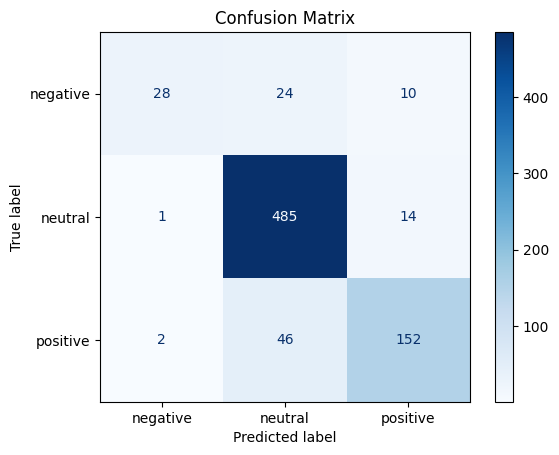

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
y_test_binarized = label_binarize(y_test, classes=['negative', 'neutral', 'positive'])
y_pred_binarized = label_binarize(y_pred, classes=['negative', 'neutral', 'positive'])
n_classes = y_test_binarized.shape[1]

In [ ]:
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_binarized[:, i])

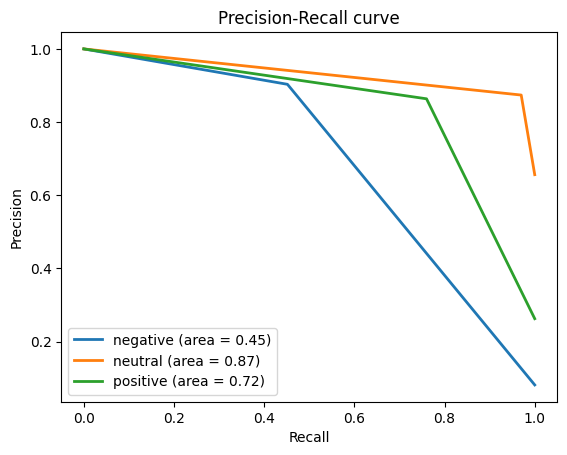

In [ ]:
# Define your specific class names
class_names = ['negative', 'neutral', 'positive']

# Plot Precision-Recall curve for each class
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_binarized[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='{0} (area = {1:0.2f})'.format(class_names[i], average_precision[i]))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.legend(loc="best")
plt.show()

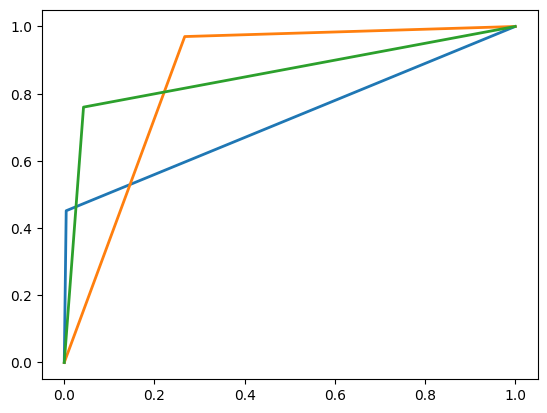

In [ ]:
# ROC Curve (only valid for binary classification or one-vs-rest approach for multiclass)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

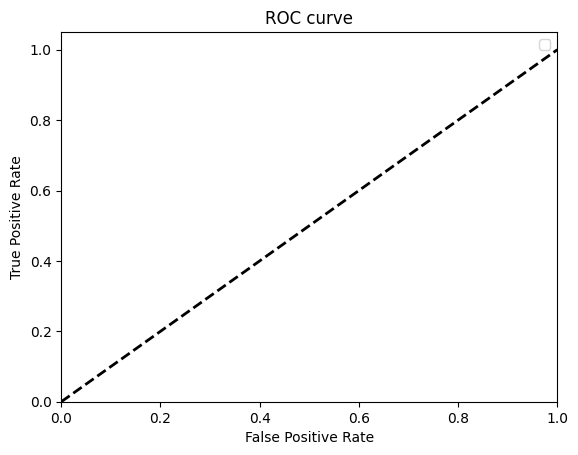

In [ ]:
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend(loc="best")
plt.show()